In [1]:
from __future__ import print_function

figure_folder = 'figures/009_false_positive_modalities'
! mkdir -p $figure_folder

In [2]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

2016-12-28 12:16:21	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-12-28 12:16:21	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2016-12-28 12:16:55 	Initializing Study
2016-12-28 12:16:55 	Initializing Predictor configuration manager for Study
2016-12-28 12:16:55	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-28 12:16:55	Added ExtraTreesClassifier to default predictors
2016-12-28 12:16:55	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-28 12:16:55	Added ExtraTreesRegressor to default predictors
2016-12-28 12:16:55	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-12-28 12:16:55	Added GradientBoostingClassifier to default predictors
2016-12-28 12:16:55	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-12-28 12:16:55	Added GradientBoostingRegressor to default predictors
2016-12-28 12:16:59 	Building Gene Ontology database...
2016-12-28 12:17:07 		Done
2016-

In [3]:
study.splicing.data_original.shape

(206, 37964)

In [4]:
miso_psi_comparison_dropna_junctions = pd.read_csv(
    '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/miso_psi_comparison_junction_reads2d.csv')
print(miso_psi_comparison_dropna_junctions.shape)
miso_psi_comparison_dropna_junctions.head()

(1445316, 13)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,NaN,NaN,46.0,NaN,NaN,SE


In [5]:
miso_psi_comparison_dropna_junctions_phenotype = miso_psi_comparison_dropna_junctions.join(study.sample_id_to_phenotype, 
                                                                                           on='sample_id')
print(miso_psi_comparison_dropna_junctions_phenotype.shape)
miso_psi_comparison_dropna_junctions_phenotype.head()

(1445316, 14)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type,phenotype
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE,NPC
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE,NPC
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE,MN
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE,NaN
4,chr10:100186972:100187021:-@chr10:100185575:10...,P2_12,0.98,1.0,Case 7: Inclusion,Case 7,32.0,NaN,NaN,46.0,NaN,NaN,SE,iPSC


In [6]:
len(miso_psi_comparison_dropna_junctions_phenotype.groupby(['miso_id']).size())

36526

In [7]:
outrigger_na = miso_psi_comparison_dropna_junctions_phenotype.loc[miso_psi_comparison_dropna_junctions_phenotype['outrigger_psi'].isnull()]
print(outrigger_na.shape)
outrigger_na.head()

(572973, 14)


,miso_id,sample_id,miso_psi,outrigger_psi,notes,notes_abbrev,junction_12,junction_13,junction_14,junction_23,junction_24,junction_34,splice_type,phenotype
0,chr10:100150355:100150511:-@chr10:100148111:10...,CVN_35,0.15,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,9.0,NaN,NaN,NaN,NaN,SE,NPC
1,chr10:100174766:100174978:-@chr10:100174489:10...,CVN_17,0.09,NaN,Case 3: All junctions with insufficient reads,Case 3,NaN,7.0,NaN,NaN,NaN,NaN,SE,NPC
2,chr10:100186972:100187021:-@chr10:100185575:10...,M2_05,0.94,NaN,Case 4: Only one junction with sufficient reads,Case 4,NaN,NaN,NaN,23.0,NaN,NaN,SE,MN
3,chr10:100186972:100187021:-@chr10:100185575:10...,MSA_31,0.85,NaN,Case 3: All junctions with insufficient reads,Case 3,5.0,NaN,NaN,NaN,NaN,NaN,SE,NaN
6,chr10:100186972:100187021:-@chr10:100185575:10...,M4_05,0.82,NaN,Case 4: Only one junction with sufficient reads,Case 4,10.0,NaN,NaN,7.0,NaN,NaN,SE,MN


In [8]:
len(outrigger_na.groupby('miso_id').size())

33332

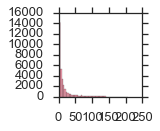

In [9]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
sns.distplot(outrigger_na.groupby(['miso_id']).size(), color='crimson', kde=False)
fig.savefig('{}/outrigger_na_distplot.pdf'.format(figure_folder))

In [10]:
outrigger_na_phenotype_id = outrigger_na.groupby(['miso_id', 'phenotype', 'splice_type']).size().reset_index()
outrigger_na_phenotype_id = outrigger_na_phenotype_id.rename(columns={0: 'n_samples'})
print(outrigger_na_phenotype_id.shape)
outrigger_na_phenotype_id.head()

(74406, 4)


,miso_id,phenotype,splice_type,n_samples
0,chr10:100150355:100150511:-@chr10:100148111:10...,NPC,SE,1
1,chr10:100174766:100174978:-@chr10:100174489:10...,NPC,SE,1
2,chr10:100186972:100187021:-@chr10:100185575:10...,MN,SE,2
3,chr10:100190328:100190427:-@chr10:100189548:10...,NPC,SE,1
4,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,SE,1


In [11]:
left_cols = ['miso_id', 'phenotype']
right_cols = ['event_id', 'phenotype']

outrigger_na_phenotype_id_modalities = outrigger_na_phenotype_id.merge(study.supplemental.modalities_tidy, 
                                                                       left_on=left_cols, right_on=right_cols)
print(outrigger_na_phenotype_id_modalities.shape)
outrigger_na_phenotype_id_modalities.head()

(36545, 6)


,miso_id,phenotype,splice_type,n_samples,event_id,modality
0,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,SE,1,chr10:100190328:100190427:-@chr10:100189548:10...,bimodal
1,chr10:100193697:100193848:-@chr10:100190888:10...,iPSC,SE,8,chr10:100193697:100193848:-@chr10:100190888:10...,uncategorized
2,chr10:100193740:100193848:-@chr10:100190888:10...,iPSC,SE,4,chr10:100193740:100193848:-@chr10:100190888:10...,uncategorized
3,chr10:100195392:100195529:-@chr10:100195029:10...,iPSC,SE,2,chr10:100195392:100195529:-@chr10:100195029:10...,uncategorized
4,chr10:101507014:101507147:+@chr10:101510126:10...,NPC,SE,1,chr10:101507014:101507147:+@chr10:101510126:10...,uncategorized


In [12]:
modalities_counts = outrigger_na_phenotype_id_modalities.groupby(['phenotype', 'modality',]).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,miso_id,splice_type,n_samples,# AS events
0,MN,bimodal,996,996,996,996
1,MN,excluded,2207,2207,2207,2207
2,MN,included,2332,2332,2332,2332
3,MN,middle,26,26,26,26
4,MN,uncategorized,2679,2679,2679,2679


In [13]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [14]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,4264,3090,2207
bimodal,778,740,996
included,5398,3699,2332
middle,107,53,26
uncategorized,5629,4547,2679


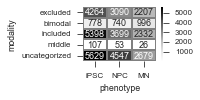

In [15]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(figure_folder))

In [16]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,miso_id,splice_type,n_samples,# AS events,percentage
0,MN,bimodal,996,996,996,996,12.087379
1,MN,excluded,2207,2207,2207,2207,26.783981
2,MN,included,2332,2332,2332,2332,28.300971
3,MN,middle,26,26,26,26,0.315534
4,MN,uncategorized,2679,2679,2679,2679,32.512136
5,NPC,bimodal,740,740,740,740,6.101080
6,NPC,excluded,3090,3090,3090,3090,25.476132
7,NPC,included,3699,3699,3699,3699,30.497156
8,NPC,middle,53,53,53,53,0.436969
9,NPC,uncategorized,4547,4547,4547,4547,37.488664


/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2894: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


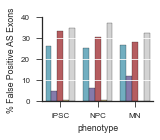

In [17]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% False Positive AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

# ax.set(ylim=(0, 1))
# # ax.grid(axis='y', color='grey', zorder=np.inf)
# fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))


In [18]:
modalities_counts_splice_types = outrigger_na_phenotype_id_modalities.groupby(['phenotype', 'modality', 'splice_type']).count().reset_index()
modalities_counts_splice_types = modalities_counts_splice_types.rename(columns={'event_id': '# AS events'})
modalities_counts_splice_types.head()

,phenotype,modality,splice_type,miso_id,n_samples,# AS events
0,MN,bimodal,MXE,105,105,105
1,MN,bimodal,SE,891,891,891
2,MN,excluded,MXE,353,353,353
3,MN,excluded,SE,1854,1854,1854
4,MN,included,MXE,238,238,238


In [19]:
modalities_counts_splice_types['percentage'] = 100*modalities_counts_splice_types.groupby('splice_type')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts_splice_types.head()

,phenotype,modality,splice_type,miso_id,n_samples,# AS events,percentage
0,MN,bimodal,MXE,105,105,105,1.652762
1,MN,bimodal,SE,891,891,891,2.951113
2,MN,excluded,MXE,353,353,353,5.556430
3,MN,excluded,SE,1854,1854,1854,6.140700
4,MN,included,MXE,238,238,238,3.746262


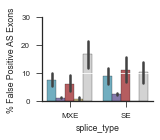

In [20]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='splice_type', hue='modality', y='percentage', data=modalities_counts_splice_types, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, #x_order=study.phenotype_order, 
            zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% False Positive AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot_splice_types.pdf'.format(folder))

# ax.set(ylim=(0, 1))
# # ax.grid(axis='y', color='grey', zorder=np.inf)
# fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))
